# DDoS Zombie Attack Detection using Network Flow Data with Decision Tree Modela

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("1-Neris-20110810.binetflow.csv")     # DDoS Zombie Attack

In [ ]:
df1.shape

(2824636, 15)

In [ ]:
df1.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt


### Data Preprocessing

In [ ]:
df1 = df1.drop('Dir', axis =1)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
nRow, nCol = df1.shape
print(f'This Dataset has {nRow} rows and {nCol} columns')

This Dataset has 2619340 rows and 14 columns


In [ ]:
for i, col in enumerate(df1.columns):
    print(i, col)

0 StartTime
1 Dur
2 Proto
3 SrcAddr
4 Sport
5 DstAddr
6 Dport
7 State
8 sTos
9 dTos
10 TotPkts
11 TotBytes
12 SrcBytes
13 Label


In [ ]:
df1.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
df1['Label'].value_counts()

flow=Background-UDP-Established                                            1169677
flow=To-Background-UDP-CVUT-DNS-Server                                      941681
flow=Background-TCP-Established                                             216353
flow=Background-Established-cmpgw-CVUT                                      137176
flow=Background-TCP-Attempt                                                  52802
                                                                            ...   
flow=From-Botnet-V42-TCP-Established-HTTP-Ad-60                                  1
flow=From-Botnet-V42-TCP-HTTP-Not-Encrypted-Down-2                               1
flow=From-Botnet-V42-TCP-Established-HTTP-Binary-Download-Custom-Port-5          1
flow=From-Botnet-V42-TCP-Established-HTTP-Adobe-4                                1
flow=From-Botnet-V42-TCP-Established-HTTP-Ad-49                                  1
Name: Label, Length: 108, dtype: int64

In [ ]:
# Create a new column and initialize with 'Benign'
df1['Attack_Label'] = 'Benign'


In [ ]:
df1.loc[df1["Label"].str.contains("botnet", case=False), "Attack_Label"] = "DDoS Zombie Attack"

In [ ]:
df1[df1['Label'].str.contains("botnet", case=False)]

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Attack_Label
675613,2011/08/10 11:04:24.863449,0.000278,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack
675948,2011/08/10 11:04:27.118993,0.020525,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack
675953,2011/08/10 11:04:27.140727,0.045125,tcp,147.32.84.165,1027,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V42-TCP-HTTP-Google-Net-Estab...,DDoS Zombie Attack
690001,2011/08/10 11:06:23.268442,0.336250,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,215,71,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack
690036,2011/08/10 11:06:23.606888,3514.083496,tcp,147.32.84.165,1039,60.190.222.139,65520,SPA_SPA,0.0,0.0,120,7767,2690,flow=From-Botnet-V42-TCP-Established,DDoS Zombie Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785162,2011/08/10 15:48:47.056523,0.099087,udp,147.32.84.165,2077,82.146.55.155,53,CON,0.0,0.0,2,142,71,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack
2785216,2011/08/10 15:48:47.447119,0.000349,udp,147.32.84.165,2079,147.32.80.9,53,CON,0.0,0.0,2,138,69,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack
2785332,2011/08/10 15:48:48.448462,0.000405,udp,147.32.84.165,2079,147.32.80.9,53,CON,0.0,0.0,2,138,69,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack
2785388,2011/08/10 15:48:49.059334,0.056870,udp,147.32.84.165,2077,188.65.208.29,53,CON,0.0,0.0,2,144,72,flow=From-Botnet-V42-UDP-DNS,DDoS Zombie Attack


In [ ]:
# Drop the original 'Label' column and rename the new column to 'Label'
df1.drop('Label', axis=1, inplace=True)
df1.rename(columns={'Attack_Label': 'Label'}, inplace=True)

In [ ]:
df1['Label'].value_counts()

Benign                2591214
DDoS Zombie Attack      28126
Name: Label, dtype: int64

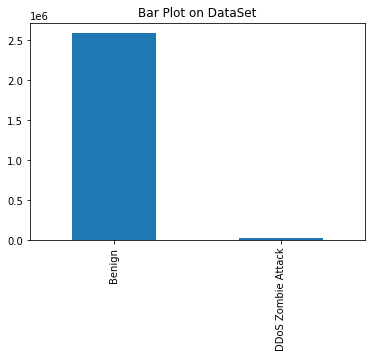

In [ ]:
# statistical counts of genuine and malicious ddos flows
counts = df1['Label'].value_counts()
counts.plot(kind = 'bar')
plt.title('Bar Plot on DataSet')
plt.show()

In [ ]:
df1.sample(n=20)

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
1029586,2011/08/10 11:54:22.741855,0.000865,udp,78.84.227.218,9377,147.32.84.229,13363,CON,0.0,0.0,2,134,74,Benign
131624,2011/08/10 10:02:15.439733,1474.215942,udp,76.16.133.153,14901,147.32.84.229,13363,CON,0.0,0.0,9,1577,1158,Benign
1396469,2011/08/10 12:47:45.417923,126.065933,tcp,147.32.86.194,1246,72.21.203.145,443,FSPA_FSPA,0.0,0.0,174,143463,5953,Benign
1016800,2011/08/10 11:52:40.502334,3023.618896,udp,213.180.53.50,59074,147.32.86.186,1643,CON,0.0,0.0,12,1337,878,Benign
1750506,2011/08/10 13:34:46.809668,0.002081,udp,147.32.84.165,2077,147.32.80.9,53,CON,0.0,0.0,2,251,75,DDoS Zombie Attack
699969,2011/08/10 11:07:46.826988,1824.024658,udp,92.24.168.168,42953,147.32.84.229,13363,CON,0.0,0.0,4,268,148,Benign
2414326,2011/08/10 15:00:25.189812,0.001270,udp,122.52.43.132,21571,147.32.84.229,13363,CON,0.0,0.0,2,621,75,Benign
1684175,2011/08/10 13:26:02.306724,0.000348,udp,147.32.84.138,42672,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
1054702,2011/08/10 11:57:57.872621,1.246214,tcp,174.252.119.76,53399,147.32.84.229,13363,FSPA_FSPA,0.0,0.0,20,1652,970,Benign
990677,2011/08/10 11:49:01.862886,2773.637451,udp,94.255.24.243,31192,147.32.84.229,13363,CON,0.0,0.0,4,1176,150,Benign


Feature Scaling

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df1.select_dtypes(include=['float64','int64']).columns
sc_df = scaler.fit_transform(df1.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_df = pd.DataFrame(sc_df, columns = cols)

In [ ]:
categorical_cols = df1.select_dtypes(include='O').keys()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Loop through each categorical column and apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col].astype(str))

### Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70:30 ratio
train_X, test_X, train_Y, test_Y = train_test_split(df1.drop('Label', axis=1), df1['Label'], test_size=0.3, random_state=42)


In [ ]:
train_X.shape

(1833538, 13)

In [ ]:
train_X.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes
1829227,1689518,2700.529541,4,406108,35210,14450,3663,6,0.0,0.0,6,401,221
1829592,1689869,5.791405,3,82150,28182,67713,55621,63,0.0,0.0,96,76483,7220
897474,826388,0.000328,4,82273,49812,14371,42589,6,0.0,0.0,2,326,85
1052162,969869,0.563004,3,82232,24728,43634,54802,168,0.0,0.0,11,1081,572
1270221,1174490,2926.506348,4,82213,3698,47348,56839,6,0.0,0.0,14,1480,482


In [ ]:
train_Y.head()

1829227    0
1829592    0
897474     0
1052162    0
1270221    0
Name: Label, dtype: int64

### Model Training and Prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()   
model.fit(train_X, train_Y)

DecisionTreeClassifier()

In [ ]:
y_preds = model.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

Text(33.0, 0.5, 'Predicted labels')

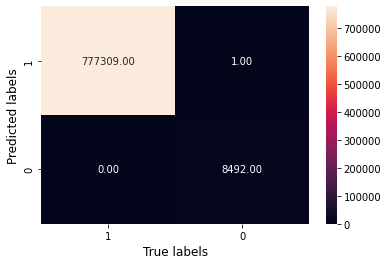

In [ ]:
cm_dt = confusion_matrix(test_Y, y_preds)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

In [ ]:

print("Detection Accuracy: ", accuracy_score(test_Y, y_preds)*100,"%")

Detection Accuracy:  99.99987274147941 %


### Export Model

In [ ]:
import pickle

pickle.dump(model, open("NF-1-DDoS-Zombie-Attack.pkl", "wb"))